In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [45]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df["Extracurricular Activities"]=lab.fit_transform(df["Extracurricular Activities"])

In [47]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [48]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [49]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

<Axes: xlabel='Hours Studied'>

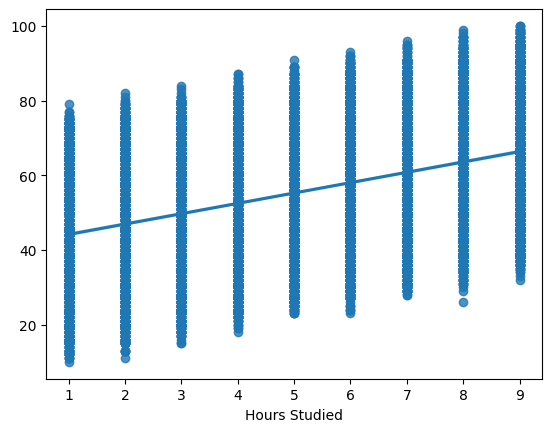

In [51]:
import seaborn as sns
sns.regplot(x=df["Hours Studied"],y=y)

<Axes: xlabel='Previous Scores'>

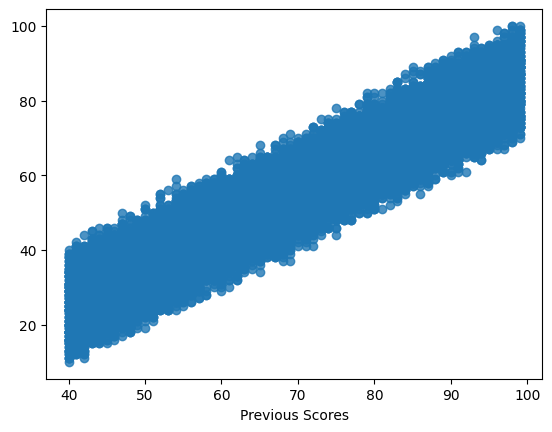

In [52]:
sns.regplot(x=df["Previous Scores"],y=y)

<Axes: xlabel='Extracurricular Activities'>

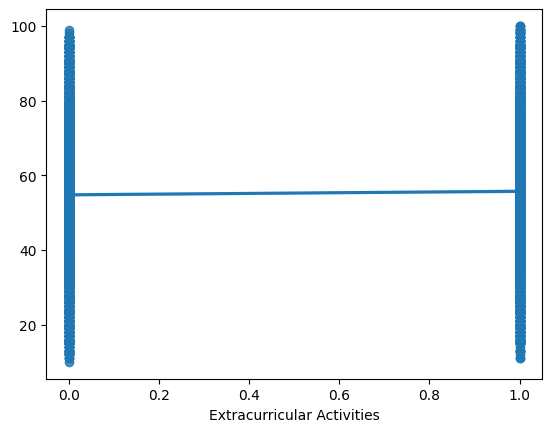

In [53]:
sns.regplot(x=df["Extracurricular Activities"],y=y)

<Axes: xlabel='Sleep Hours'>

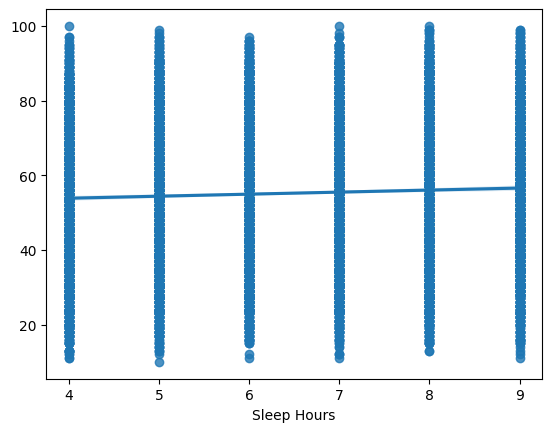

In [54]:
import seaborn as sns
sns.regplot(x=df["Sleep Hours"],y=y)

<Axes: xlabel='Sample Question Papers Practiced'>

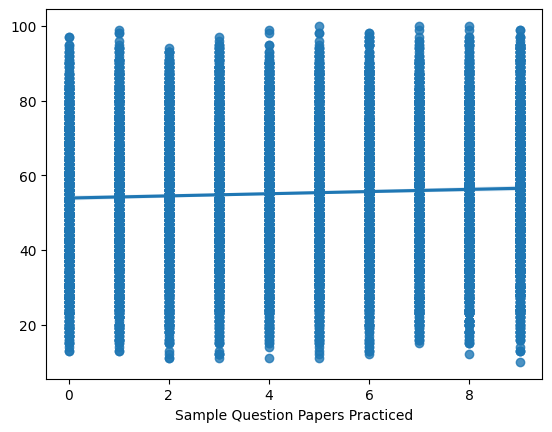

In [55]:
import seaborn as sns
sns.regplot(x=df["Sample Question Papers Practiced"],y=y)

In [56]:
from sklearn.model_selection import train_test_split
x_train,xtest,y_train,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(xtest)
y_pred

array([61.17057416, 63.78913778, 77.73596894, ..., 85.7751157 ,
       62.93382941, 43.72125123])

In [58]:
ytest

array([58., 64., 75., ..., 87., 68., 47.])

In [59]:
df1=pd.DataFrame({"Actual value": ytest,"Predicted value": y_pred})
df1

,Actual value,Predicted value
0,58.0,61.170574
1,64.0,63.789138
2,75.0,77.735969
3,59.0,63.447275
4,86.0,86.387768
...,...,...
2995,51.0,45.081534
2996,32.0,31.726320
2997,87.0,85.775116
2998,68.0,62.933829


In [60]:
from sklearn.metrics import mean_absolute_error
print("mae:",mean_absolute_error(ytest,y_pred))

mae: 1.6173174221523658


In [61]:
from sklearn.metrics import mean_absolute_percentage_error
mse=mean_absolute_percentage_error(ytest,y_pred)
print("mae:",mse)

mae: 0.03423948017893244


In [62]:
print("RMSE is",np.sqrt(mse))

RMSE is 0.18503913148016135


In [63]:
print("slope is",model.coef_)
print("constant is",model.intercept_)

slope is [2.85406022 1.01826685 0.59659517 0.47551045 0.19146725]
constant is -33.99877454524179
